Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 3

##### Import packages:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import scipy as scipy

In [21]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

##### Define functions:

In [34]:
def solve_ODE_2D(f, g, t_vals, initial_cond):
    '''Solves a 2D system of differential equations. (copy from Assignment 2)'''
    x0 = initial_cond[0]; y0 = initial_cond[1]
    
    x_vals = []
    y_vals = []
    
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]: # append the initial condition
            x_vals.append(x0)
            y_vals.append(y0)
            
        else:
            x_val = x_vals[-1] + DeltaT*f(x_vals[-1],  y_vals[-1])
            y_val = y_vals[-1] + DeltaT*g(x_vals[-1], y_vals[-1])
            
            x_vals.append(x_val); y_vals.append(y_val)
    
    return (np.array(x_vals), np.array(y_vals))

## 3.1 - Quasi-Steady-State Approximation: linear example

Define the two functions defining the system of differential equations:

In [5]:
def xdot(x, y):
    return -3*x + y

In [6]:
def ydot(x, y):
    return 100*(2*x - y)

Get the solutions to find the fast and slow. Define initial conditions given in the assignment first.

In [35]:
x0 = 1 ; y0 = 0
t_vals = np.array(np.arange(0, 2, 0.00001))

x_vals, y_vals = solve_ODE_2D(xdot, ydot, t_vals, (x0, y0))

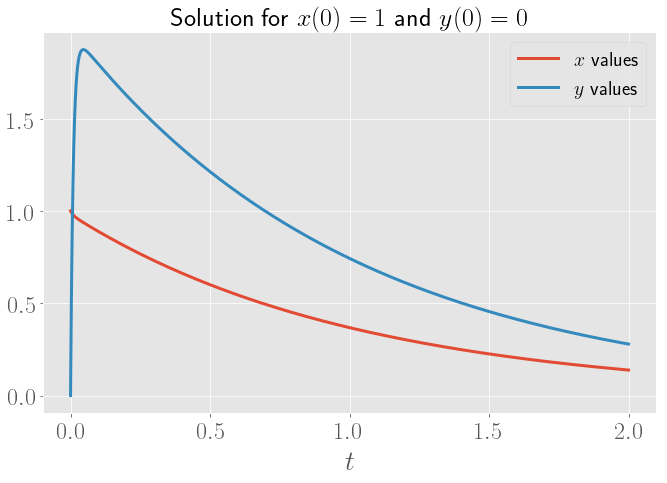

In [40]:
plt.figure(figsize = (11,7))
plt.plot(t_vals, x_vals, label = r'$x$ values')
plt.plot(t_vals, y_vals, label = r'$y$ values')

# Make fancy, save and show
plt.legend(fontsize = 20)
plt.title(r'Solution for $x(0) = 1$ and $y(0) = 0$')
plt.xlabel(r'$t$')
plt.savefig('ex3_1_solutions.pdf', bbox_inches = 'tight')
plt.show()

The fast variable is $y$. Now apply the QSSA, this gives $y = 2x$.

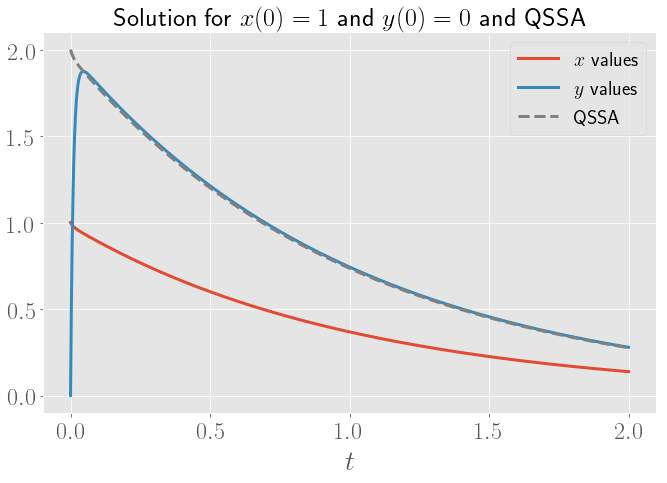

In [39]:
plt.figure(figsize = (11,7))

# Plot the solutions
plt.plot(t_vals, x_vals, label = r'$x$ values')
plt.plot(t_vals, y_vals, label = r'$y$ values')

# Plot QSSA

plt.plot(t_vals, 2*x_vals, '--', color = 'grey', label = 'QSSA')

# Make fancy, save and show
plt.legend(fontsize = 20)
plt.title(r'Solution for $x(0) = 1$ and $y(0) = 0$ and QSSA')
plt.xlabel(r'$t$')
plt.savefig('ex3_1_solutions_QSSA.pdf', bbox_inches = 'tight')
plt.show()

## 3.2 - Enzymatic degradation

In [43]:
def enzyme_degrad(x):
    return x/(x+1) # note absolute value!

Make a plot of the enzymatic degradation curve.

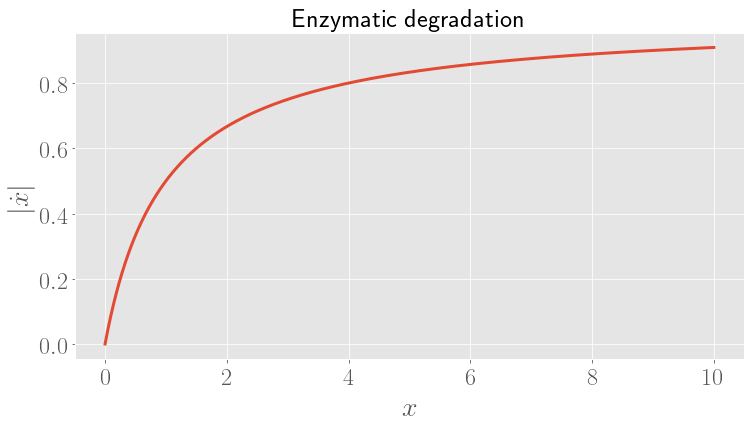

In [49]:
plt.figure(figsize = (12, 6))
x = np.arange(0, 10, 0.0001)
y = enzyme_degrad(x)

plt.plot(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$|\dot{x}|$')
plt.title('Enzymatic degradation')
plt.savefig('ex3_2_enzym_degrad.pdf', bbox_inches = 'tight')
plt.show()

## 3.3 - Two subunit enzyme